
# Introduction to Text Mining and Natural Language Processing ##########
##############################################################################
# Sentiment Analysis and Sentiment Modeling for Amazon Reviews ####################
# 1. Text Preprocessing 
# 2. Text Visualization 
# 3. Sentiment Analysis 
# 4. Feature Engineering 
# 5. Sentiment Modeling
##############################################################################

In [2]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL                        import Image
from nltk.corpus                import stopwords
from nltk.sentiment             import SentimentIntensityAnalyzer
from sklearn.ensemble           import RandomForestClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.model_selection    import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing      import LabelEncoder
from textblob                   import Word, TextBlob
from wordcloud                  import WordCloud

In [3]:
filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

---
## 1. Text Preprocessing
---

In [4]:
df = pd.read_csv("nlp/datasets/amazon_reviews.csv", sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


- # Normalizing Case Folding

In [5]:
df['reviewText']

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [6]:
# Küçük harfe çevirme
df['reviewText'] = df['reviewText'].str.lower()

In [7]:
df['reviewText']

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

- Punctations

In [8]:
# Noktalama işaretlerini kaldırma
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]', '', regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

* Numbers

In [9]:
# Sayıları kaldırma
df['reviewText'] = df['reviewText'].str.replace(r'\d+', '', regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

* Stopwords

In [10]:
import nltk
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Giray\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

* Rarewords

Nadir kelimeler örüntü oluşturamaz varsayımıyla metinden atmak.

Kelime frekansını hesaplayıp filtreleyerek yapabiliriz

In [13]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
sharper          1
cheapos          1
gate             1
measuring        1
stealwould       1
Name: count, Length: 9701, dtype: int64

In [14]:
drops = temp_df[temp_df <= 1]
drops

conclusionmy       1
mbsbuy             1
flimsier           1
disappointedtry    1
priceokay          1
                  ..
sharper            1
cheapos            1
gate               1
measuring          1
stealwould         1
Name: count, Length: 5612, dtype: int64

In [15]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

* Tokenization

In [16]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

* Lemmatization

kelimeleri köklerine indirgemek

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Giray\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewText']
# mesela works-->work oldu

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

---
## 1. Text Visualization
---

* Terim Frekanslarının Hesaplanması

In [19]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [20]:
tf.head() #term frequency

,index,0
0,issue,609.00
1,purchased,344.00
2,device,584.00
3,worked,460.00
4,advertised,111.00


In [21]:
tf.columns = ["words", "tf"]

In [22]:
tf.head()

,words,tf
0,issue,609.00
1,purchased,344.00
2,device,584.00
3,worked,460.00
4,advertised,111.00


In [23]:
tf.tail()

,words,tf
3686,pureview,3.00
3687,laptoptablet,2.00
3688,employee,2.00
3689,sandisksequential,2.00
3690,chkdsk,2.00


In [24]:
tf.sort_values("tf", ascending=False)

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2723,headline,2.00
2722,sizethe,2.00
2720,everybody,2.00
3690,chkdsk,2.00


* Barplot

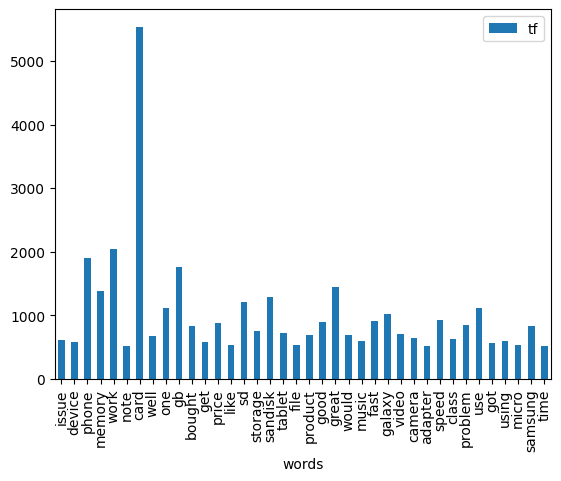

In [25]:
# 3691 kelimeyi göstermek düzgün olmayacağı için azaltıyoruz.
tf[tf["tf"]>500].plot.bar(x="words", y="tf")
plt.show()

* Wordcloud

In [26]:
# tek bir text yapma
text = " ".join(i for i in df.reviewText)
text

'issue purchased device worked advertised never much phone memory since download lot stuff brainer work expected higher capacity think made bit earlier version paint look clean think worked gb card went south one held pretty well since note update ive month zero issue since transferred note note card reliable bought retail packaging arrived legit envelope version asian like picture show arrived quickly bought retail packaging htc one lg optimus card working order probably best price youll get nice sd card mini storage doesnt anything else supposed purchased add additional storage microsoft surface pro tablet come gb supposed sandisk long standing reputation speaks phone never skip beat file transfer speedy corruption issue memory issue would expect sandisk brand great card precious file slightly cheaper piece crap lose everything spending extra couple buck trusted product go good qa hard believe affordable digital become gb device one quarter postage stamp would less generation picked 

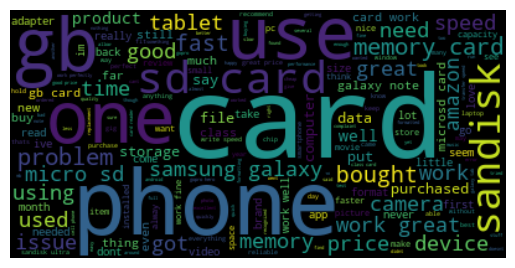

In [27]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

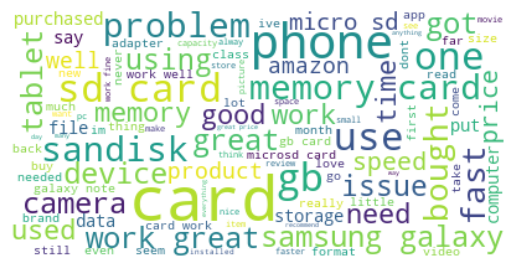

In [28]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
#kaydetme
#wordcloud.to_file("wordcloud.png");

* Wordcloud with template

In [30]:
tr_mask = np.array(Image.open("tr.png"))

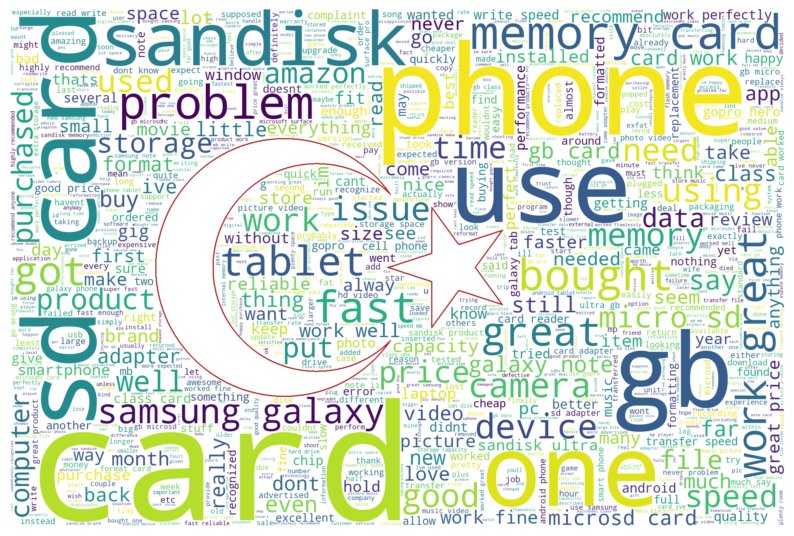

In [31]:
wc = WordCloud(background_color="white",
               max_words=1000,
               mask=tr_mask,
               contour_width=3,
               contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

---
## 3. Sentiment Analysis (Duygu Durum Analizi)
---

never gibi kelimeleri negatife ata
always gibi kelimleri pozitife ata

device gibi kelimeleri nötre ata

**Unsupervised Learning** ile 
polarity score oluşturulsun.

In [32]:
df["reviewText"].head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit envelope...
Name: reviewText, dtype: object

In [33]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Giray\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
sia = SentimentIntensityAnalyzer()

In [35]:
# examples
print(sia.polarity_scores("The film was awesome"))
print(sia.polarity_scores("The film was awful"))
print(sia.polarity_scores("I am very intelligent"))
print(sia.polarity_scores("You are unintelligent"))

print(sia.polarity_scores("This movie is fun but it is not good as the first one."))

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.0, 'neu': 0.378, 'pos': 0.622, 'compound': 0.5095}
{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.191, 'neu': 0.677, 'pos': 0.132, 'compound': -0.2404}


In [36]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [37]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

df.head(12)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else supposed pur...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0,0.87
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,0.82
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound running short space gb sandis...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,0.00
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0,0.92


# 4. Feature Engineering 

1. **Unsupervised Learning** ile elde ettiğimiz verileri belirli bir treshold'a göre label'layarak **Supervised Learning** 'e geçirebiliriz.

2. En başından label'layarak **Supervised Learning** 'de direkt çalışabiliriz.

In [38]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [39]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos


In [40]:
# sınıf dağılımları
df["sentiment_label"].value_counts()

sentiment_label
pos    3944
neg     971
Name: count, dtype: int64

In [41]:
# Overall rating ortalamaları
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [42]:
# Makine öğrenmesi anlayabilsin diye binary target feature oluşturuyoruz
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,1


In [43]:
# dependent variable & independent variable
y = df["sentiment_label"]
X = df["reviewText"]

Vectorizing words

--> Bağımsız değişkenleri oluşturmak

----

Kelime vektörleri oluşturma yöntemleri
1. Count Vectors  : Frekans temsiller
2. TF-IDF Vectors : Normalize edilmiş frekans temsiller
3. Word Embeddings (Word2Vec, GloVe, BERT, vs)

* ### Count Vectors

- - Words

--------- Kelimelerin numerik temsilleri

- - Characters

--------- Karakterlerin numerik temsilleri

- - N-gram

--------- N-gram'lar birlikte kullanılan kelimlerin kombinasyonlarını gösterir ve feature üretmek için kullanılır.

In [44]:
# N-Gram example
a = """The agent program implements the agent function. There are various 
agent program designs that reflect the type of information exposed 
and used in the decision process."""
TextBlob(a).ngrams(3)

[WordList(['The', 'agent', 'program']),
 WordList(['agent', 'program', 'implements']),
 WordList(['program', 'implements', 'the']),
 WordList(['implements', 'the', 'agent']),
 WordList(['the', 'agent', 'function']),
 WordList(['agent', 'function', 'There']),
 WordList(['function', 'There', 'are']),
 WordList(['There', 'are', 'various']),
 WordList(['are', 'various', 'agent']),
 WordList(['various', 'agent', 'program']),
 WordList(['agent', 'program', 'designs']),
 WordList(['program', 'designs', 'that']),
 WordList(['designs', 'that', 'reflect']),
 WordList(['that', 'reflect', 'the']),
 WordList(['reflect', 'the', 'type']),
 WordList(['the', 'type', 'of']),
 WordList(['type', 'of', 'information']),
 WordList(['of', 'information', 'exposed']),
 WordList(['information', 'exposed', 'and']),
 WordList(['exposed', 'and', 'used']),
 WordList(['and', 'used', 'in']),
 WordList(['used', 'in', 'the']),
 WordList(['in', 'the', 'decision']),
 WordList(['the', 'decision', 'process'])]

In [45]:
X.head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit envelope...
Name: reviewText, dtype: object

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Words
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third document',
          'Is this the first document?']

In [48]:
# Word Frekans
vectorizer1 = CountVectorizer()
X_c = vectorizer1.fit_transform(corpus)
unique_words = vectorizer1.get_feature_names_out()
X_c.toarray()

array([[0, 1, 1, 1, 0, 1, 0, 1],
       [0, 2, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 0, 1]], dtype=int64)

In [49]:
print(unique_words)

['and' 'document' 'first' 'is' 'second' 'the' 'third' 'this']


In [50]:
# N-gram Frekans
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
ngramVector = vectorizer2.get_feature_names_out()
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [51]:
print(ngramVector)

['and this' 'document is' 'first document' 'is the' 'is this'
 'second document' 'the first' 'the second' 'the third' 'third document'
 'this document' 'this is' 'this the']


In [52]:
# ANA VERİ SETİNDE UYGULAYALIM
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [53]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

* ### TF-IDF

Count Vector yönteminin ortaya çıkartabileceği bazı yanlılıkları gidermek adına normalize edilmiş/standartlaştırılmış bir kelime vektörü oluşturma yöntemidir.

Kelimelerin dökümanlarda geçme frekansını ve kelimlerin bütün corpusta geçme frekansları odağında bir standartlaştırma işlemi yapılır.

![](tf-idf/tf-idf%201-2.png)

![](tf-idf/tf-idf%203.png)

![](tf-idf/tf-idf%204.png)

![](tf-idf/tf-idf-5.png)

In [54]:
# ANA VERİ SETİNDE UYGULAYALIM
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
# words
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

print(tf_idf_word_vectorizer.get_feature_names_out()[20:30])
print("size: ", tf_idf_word_vectorizer.get_feature_names_out().size)

['according' 'account' 'accurate' 'acer' 'achieve' 'acknowledged'
 'acquire' 'acquired' 'across' 'act']
size:  3668


In [57]:
# ngrams
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

print(tf_idf_ngram_vectorizer.get_feature_names_out()[20:30])
print("size: ", tf_idf_ngram_vectorizer.get_feature_names_out().size)

['ability plug play' 'ability put' 'ability put directly'
 'ability sandisk' 'ability sandisk done' 'ability something'
 'ability something small' 'ability stick' 'ability stick minidrive'
 'ability store']
size:  160043


# 5. Sentiment Modeling

1. ### Logistic Regression

In [58]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

In [59]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.830111902339776

In [60]:
new_review1 = pd.Series("this product is great")
new_review2 = pd.Series("look at that garbage very bad")
new_review3 = pd.Series("it was good but I am sure that it fits me")

In [61]:
new_review1 = TfidfVectorizer().fit(X).transform(new_review1)
new_review2 = TfidfVectorizer().fit(X).transform(new_review2)
new_review3 = TfidfVectorizer().fit(X).transform(new_review3)

In [62]:
print(str(log_model.predict(new_review1)))
print(str(log_model.predict(new_review2)))
print(str(log_model.predict(new_review3)))

[1]
[0]
[1]


In [63]:
print(df["reviewText"].sample(1, random_state=160).values)
print("\n\n")
print(df["reviewText"].sample(1, random_state=815).values)
random_review1 = pd.Series(df["reviewText"].sample(1, random_state=160).values)
random_review2 = pd.Series(df["reviewText"].sample(1, random_state=815).values)

['first rating product star like greatest item ever rating product would product bought retail store worth money saved buy online happy product got mail yes give star rating star cause best product class person decide also updating review see fit something future thank taking time read sandisk sd card year phone lasted tough time high heat bought add movie galaxy note tablet change needed format plug play buy product new samsung tablet note work']



['title say card got defective faulty issue sd card always unmounts remount sometimes say sd card corrupted need formatted first tried format using cellphone xperia play copied file sd card gave error tried phone inspire g samsung galaxy still error tried take put computer manually format check bad sector fix error finish say cannot continue sd card corrupted searched google find sandisk shipped bad batch sd card contacted company demanded return past due return amazon got already shipped know long take send another sd card sd card put fil

In [64]:
random_review1 = TfidfVectorizer().fit(X).transform(random_review1)
random_review2 = TfidfVectorizer().fit(X).transform(random_review2)

In [65]:
print(str(log_model.predict(random_review1)))
print(str(log_model.predict(random_review2)))

[1]
[0]


2. ### Random Forests

In [69]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.842115971515768

In [70]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8240081383519838

In [71]:
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8250254323499492